**Analyze classification results**
* Accuracy
* Confusion matrix
* Recall, precision, F1-score

In [21]:
from os import path
import sys
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from matplotlib import cm
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [3]:
sys.path.append(path.abspath('~/CIFAR_10/'))
import data_transform_module as dtm

In [4]:
base_dir = "~/ConvNet/"

**Predicted and groundtruth labels for test data**

In [5]:
def mat2col(mat):
    class_vector = np.array(range(0, 10))
    for i in range(mat.shape[0]):
        mat[i] = mat[i]*class_vector
    col = np.sum(mat, axis=1)
    return col  

In [6]:
#get y_pred
path = base_dir+"PredInfo/"
pickle_filename = "class_1.p"
y_pred = dtm.unpickleSomething(path, pickle_filename)
y_pred.shape

(10000,)

In [7]:
#get y_test
path = base_dir+"DataInfo/"
pickle_filename = "y_test.p"
y_test_matrix = dtm.unpickleSomething(path, pickle_filename)
y_test_matrix.shape

(10000, 10)

In [8]:
y_test = mat2col(y_test_matrix)
y_test.shape

(10000,)

**Confusion matrix**

In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.GnBu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20, fontname="Times New Roman")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=16, fontname="Times New Roman")
    plt.xlabel('Predicted label', fontsize=16, fontname="Times New Roman")

In [10]:
#class_names
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[855   9  15  16  16   7   6   7  50  19]
 [ 17 886   3   6   2   1   5   3  32  45]
 [ 52   2 737  46  61  46  32  13  11   0]
 [ 16   1  46 713  45 111  35  14  13   6]
 [  6   0  31  41 853  18  20  27   3   1]
 [  7   1  20 124  28 783  10  21   3   3]
 [  6   1  26  44  24  17 873   4   4   1]
 [  7   0  17  34  49  49   2 836   2   4]
 [ 39   9   4  10   5   2   0   2 913  16]
 [ 28  33   4  19   4   7   3  10  28 864]]


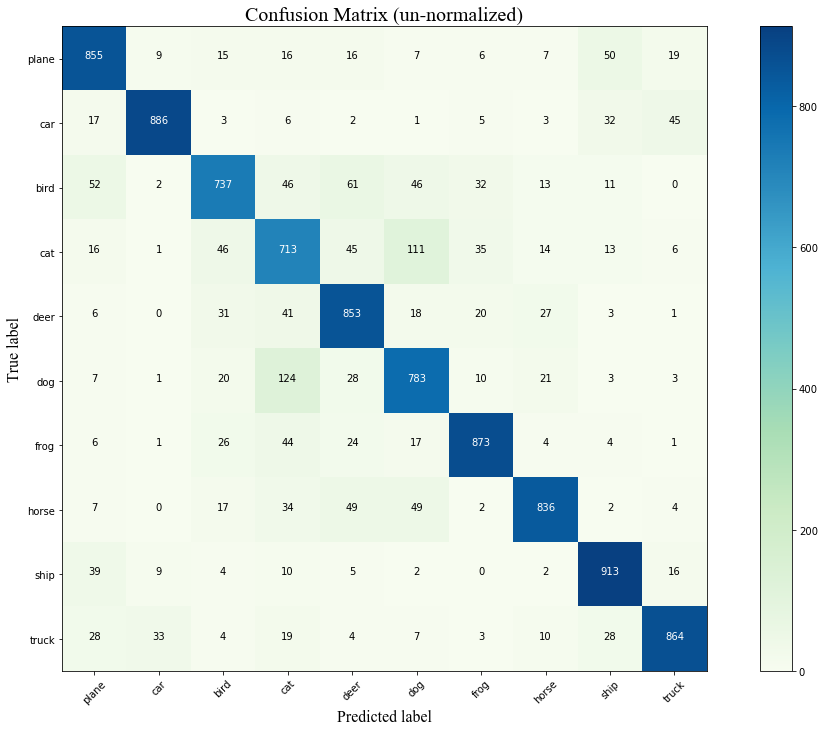

In [34]:
# Plot un-normalized confusion matrix
plt.subplots(figsize=(15,10))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion Matrix (un-normalized)')

Normalized confusion matrix
[[ 0.85  0.01  0.01  0.02  0.02  0.01  0.01  0.01  0.05  0.02]
 [ 0.02  0.89  0.    0.01  0.    0.    0.01  0.    0.03  0.04]
 [ 0.05  0.    0.74  0.05  0.06  0.05  0.03  0.01  0.01  0.  ]
 [ 0.02  0.    0.05  0.71  0.04  0.11  0.04  0.01  0.01  0.01]
 [ 0.01  0.    0.03  0.04  0.85  0.02  0.02  0.03  0.    0.  ]
 [ 0.01  0.    0.02  0.12  0.03  0.78  0.01  0.02  0.    0.  ]
 [ 0.01  0.    0.03  0.04  0.02  0.02  0.87  0.    0.    0.  ]
 [ 0.01  0.    0.02  0.03  0.05  0.05  0.    0.84  0.    0.  ]
 [ 0.04  0.01  0.    0.01  0.01  0.    0.    0.    0.91  0.02]
 [ 0.03  0.03  0.    0.02  0.    0.01  0.    0.01  0.03  0.86]]


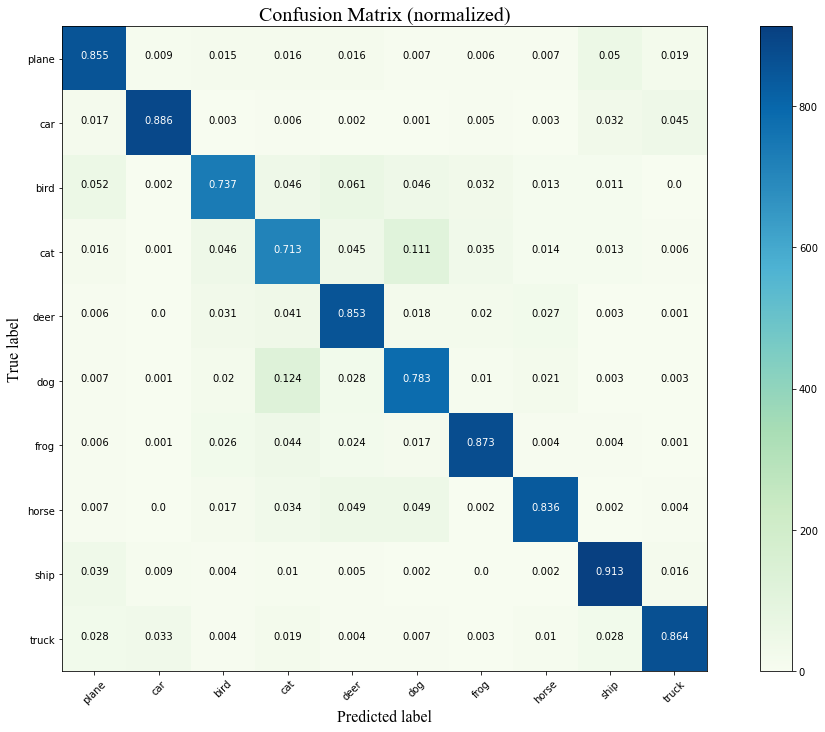

In [12]:
# Plot normalized confusion matrix
plt.subplots(figsize=(15,10))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Confusion Matrix (normalized)')

plt.show()

**Classification report**

In [13]:
print(classification_report(y_test, y_pred, target_names=class_names, digits=4))

             precision    recall  f1-score   support

      plane     0.8277    0.8550    0.8411      1000
        car     0.9406    0.8860    0.9125      1000
       bird     0.8162    0.7370    0.7746      1000
        cat     0.6771    0.7130    0.6946      1000
       deer     0.7847    0.8530    0.8174      1000
        dog     0.7522    0.7830    0.7673      1000
       frog     0.8854    0.8730    0.8792      1000
      horse     0.8922    0.8360    0.8632      1000
       ship     0.8621    0.9130    0.8868      1000
      truck     0.9009    0.8640    0.8821      1000

avg / total     0.8339    0.8313    0.8319     10000



**Accuracy**

Overall accuracy

In [14]:
# using scikit learn
accuracy_score(y_pred, y_test)

0.83130000000000004

In [15]:
# my line of code
(y_pred.shape[0] - np.count_nonzero(y_pred - y_test))/100

83.13

Per class accuracy

In [18]:
def perClassAccuracy(y_pred, y_test, c):
    y_test_thresh = (y_test != c).astype(int) * (c+1)
    y_pred_thresh = (y_pred != c).astype(int) * 2*(c+1)
    acc = ((y_pred.shape[0]-np.count_nonzero(y_pred_thresh - y_test_thresh))/1000)*100
    return acc

In [19]:
class_acc = []
for c in range(0, 10):
    acc = perClassAccuracy(y_pred, y_test, c)
    class_acc.append(acc)

class_acc        

[85.5, 88.6, 73.7, 71.3, 85.3, 78.3, 87.3, 83.6, 91.3, 86.4]

In [20]:
# make a bar plot for class accuracy
class_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
class_acc = [85.5, 88.6, 73.7, 71.3, 85.3, 78.3, 87.3, 83.6, 91.3, 86.4]

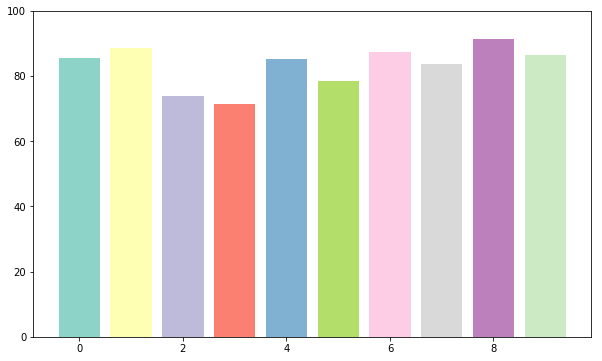

In [32]:
cs  = cm.Set3(np.arange(len(class_names))/len(class_names)) 
#ax = plt.axes
plt.subplots(figsize=(10,6))
plt.bar(range(0, 10), class_acc, align='center', color=cs)
plt.ylim( (0, 100) )
#ax.set_xticklabels(class_names, rotation=45)
plt.show()
